In [1]:
# import Python packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# open dataset using xarray (oaflux.nc)
filePath = 'paste your filepath here'
ds = xr.open_dataset(filePath)

# display dataset
ds

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [3]:
# open dataset using xarray (oaflux.nc)
filePath = '/Users/a_rust/Documents/EV353_Oceanography/oaflux.nc'
ds = xr.open_dataset(filePath)

# display dataset
ds

<xarray.Dataset>
Dimensions:  (time: 26, lat: 180, lon: 360)
Coordinates:
  * time     (time) float64 1.984e+03 1.985e+03 ... 2.008e+03 2.009e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    qlh      (lat, lon, time) float32 ...
    qlw      (lat, lon, time) float32 ...
    qsh      (lat, lon, time) float32 ...
    qsw      (lat, lon, time) float32 ...
Attributes:
    description:  oaflux

Text(0.5, 1.0, 'qnet')

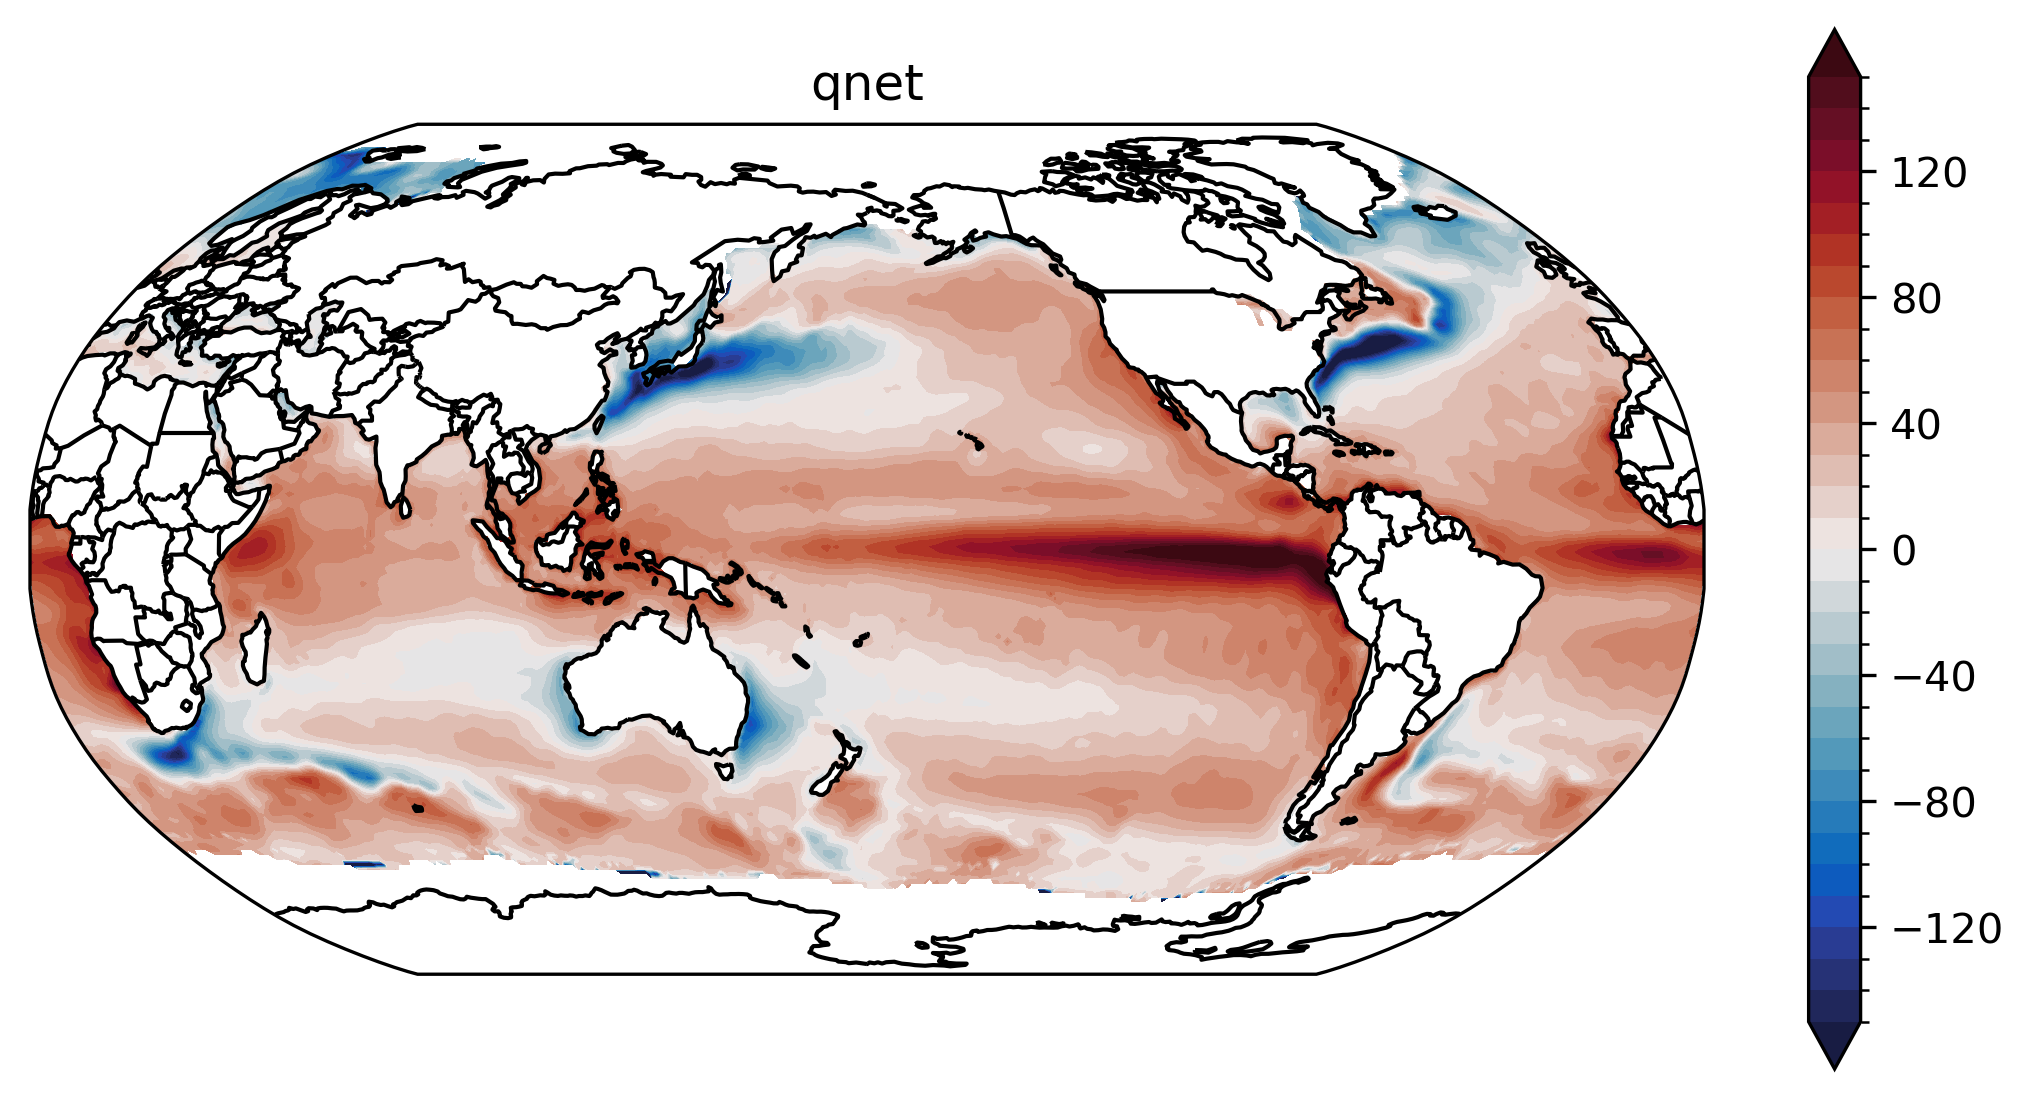

In [18]:
sw = ds['qsw']
lw = ds['qlw']
sh = ds['qsh']
lh = ds['qlh']


qnet = sw - lw - sh - lh 

qnet_mean = qnet.mean(dim='time')

# map projection, colormap using cmocean, and levels for the colorbar
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-150, 160, 10)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of DataArray
qnet_mean.plot.contourf(
    x='lon',
    y='lat',
    ax=ax,
    transform=ccrs.PlateCarree(),
    levels=lev,
    extend='both',
    cmap=cmap,
 
)
# add coastlines
ax.add_feature(cfeature.BORDERS, linestyle ='None')
ax.coastlines(resolution='110m') 

# add title
ax.set_title("qnet")





**Dataset variables and coordinates:**
- lat: latitude vector
- lon:    longitude vector (0-360 format)
- time   time vector (1984-2009)
- qsw    net downward shortwave radiation (W/m2) (time x lon x lat)
- qlw    net upward longwave radiation (W/m2) (time x lon x lat)
- qsh    net upward sensible heat flux (W/m2) (time x lon x lat)
- qlh    net upward latent heat flux (W/m2) (time x lon x lat)

**Instructions:**

1. Define variables for all 4 heat flux terms and calculate the time-mean net heat flux as a variable called `qnet`

2. Plot a global map of q_net. Some code is provided below to help get you started. 

3. Then for two different locations in the world ocean, estimate the rate of change of SST ($\partial T$/$\partial t$) in degrees C per week that would occur perpetually if net surface heat flux constituted the entire ocean mixed layer heat budget (i.e., no advection or mixing). For locations within the topics, assume a mixed layer depth h of 30 m. Otherwise use h = 80 m. Assume a constant mixed layer seawater density of 1025 kg/m$^3$

**Sample map code:**
```
# map projection, colormap using cmocean, and levels for the colorbar
proj = ccrs.Robinson(central_longitude=180)
cmap = cmocean.cm.balance
lev = np.arange(-150, 160, 10)

fig = plt.figure(figsize=(9, 4.5), dpi=300)
ax = plt.axes(projection = proj)

# filled contour map of DataArray
#...add your code here...
```

In [15]:
#3
#location 1: 30 m depth western portion of red Pacific equatorial band
density = 1025
specific_heat = 3850
depth = 30
sec_in_week = 604800
q_net = 60
# location 2: 
DT = (q_net) / (density * specific_heat * depth) 
DT1 = DT * sec_in_week
DT1 #0.3065188470066519 per week

#location 2: 60 m depth light blue portion of east coast of South America
q_net = -10
depth = 80
DT = (q_net) / (density * specific_heat * depth) 
DT2 = DT * sec_in_week
DT2 #-0.019157427937915743 per week

-0.019157427937915743